In [4]:
import pandas as pd
import numpy as np
import plotly.express as px

In [5]:
train = pd.read_csv('../data/processed/train.csv')

# Few value

- Fence
- Alley
- Heating
- Condition 1 and 2
- Electrical

In [6]:
# Few Values
train.drop(columns=['Fence', 'Alley', 'Heating', 'Condition1',
                    'Condition2', 'Electrical'], inplace=True)


In [7]:
train['GarageCars'].unique()

array([2, 3, 1, 0, 4])

# Bool Variables

These variables below can be transformed for a boolean feature. The reason behind that is because the categories don't impact so much the house price as the difference in the houses that has or not this features.

- Garage
- Bsmt
- Pool
- SecondFlor
- FirePlace
- PavedDrive

In [8]:
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x>0 else 0)
train['HasFirePlace'] = train['Fireplaces'].apply(lambda x: 1 if x!='0' else 0)
train['HasPavedDrive'] = train['PavedDrive'].apply(lambda x: 1 if x=='Yes' else 0)

train['HasBsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
#train['HasGarage'] = train['GarageCars'].apply(lambda x: 1 if x>0 else 0)
#train['Has2ndFlr'] = train['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)

In [9]:
fig = px.violin(train, y='SalePrice', x='HasPavedDrive', box=True, points='all')

fig.show()

In [10]:
# Bool variables
train.drop(columns=['Fireplaces', 'PoolArea', 'PavedDrive'], inplace=True)

# Garage Variables
- 'GarageType'
- 'GarageYrBlt',
- 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'

In [11]:
fig = px.box(train[train['GarageCars'] > 0], x='GarageCars', y="SalePrice", color='GarageCond', points='all')
fig.show()

**Conclusion**

The most important features related with Garage is Garage cars and area. So, the rest will be droped

In [12]:
# Garage Variables
train.drop(columns=['GarageType', 'GarageQual',
                    'GarageYrBlt', 'GarageFinish',
                    'GarageCond', 'GarageArea'], inplace=True)

# Portch Area

In [13]:
train['PorchArea'] = train[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                            '3SsnPorch', 'ScreenPorch']].sum(axis=1)

In [26]:
fig = px.scatter(train, x='PorchArea', y='SalePrice', trendline='ols')
fig.show()

In [15]:
#Porch Area
train.drop(columns=['WoodDeckSF','OpenPorchSF','EnclosedPorch',
                    '3SsnPorch','ScreenPorch'], inplace=True)

# Lot propriets

- LotConfig
- LotShape
- LotArea
- LotFrontage
- HouseStyle
- LandSlope
- LandContour

In [16]:
fig = px.scatter(train[train['LotArea'] < 50000], x="LotArea", y="SalePrice",
                 color='MSSubClass', facet_col="HouseStyle")

fig.show()

In [17]:
# Qual Values
train.drop(columns=['LotConfig', 'LotShape', 'LandSlope',  'LandContour', 'LotFrontage'], inplace=True)

# Qual

In [18]:
qual_columns = ['ExterQual','ExterCond','BsmtQual', 'KitchenQual']
train[qual_columns].describe()

ExterQual ExterCond BsmtQual KitchenQual
count       1460      1460     1423        1460
unique         3         4        4           4
top        Fa/TA        TA       TA          TA
freq         920      1282      649         735

In [19]:
px.violin(train, x='KitchenQual', y='SalePrice', box=True)

In [23]:
train['ExterQual'].replace(['Fa/TA'],'0', inplace=True)
train['ExterQual'].replace(['Gd'],'1', inplace=True)
train['ExterQual'].replace(['Ex'],'2', inplace=True)
train['ExterQual'] = train['ExterQual'].apply(int)

train['BsmtQual'].replace(['Fa'],'0', inplace=True)
train['BsmtQual'].replace(['TA'],'1', inplace=True)
train['BsmtQual'].replace(['Gd'],'2', inplace=True)
train['BsmtQual'].replace(['Ex'],'3', inplace=True)
train['BsmtQual'].fillna('0', inplace=True)
train['BsmtQual'] = train['BsmtQual'].apply(int)

train['KitchenQual'].replace(['Fa'],'0', inplace=True)
train['KitchenQual'].replace(['TA'],'1', inplace=True)
train['KitchenQual'].replace(['Gd'],'2', inplace=True)
train['KitchenQual'].replace(['Ex'],'3', inplace=True)
train['KitchenQual'] = train['KitchenQual'].apply(int)

In [ ]:
fig = px.violin(train, x='OverallQual', y='SalePrice')
fig.show()

**Conclusion**

For the first model we can use just the OveralQual

In [24]:
# Qual Values
train.drop(columns=['FireplaceQu', 'PoolQC',  'HeatingQC',
                    'ExterCond', 'BsmtCond'], inplace=True)

# Bsmt

In [19]:
col = train.columns
bsmt = [col for col in train.columns if 'Bsmt' in col]
train[bsmt].head()

BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF  HasBsmt  
0          856        1  
1         1262        1  
2          920        1  
3          756        1  
4         1145        1

In [25]:
fig = px.scatter(train[train['HasBsmt']==1], x="SalePrice", y="TotalBsmtSF", trendline='ols')
fig.show()

In [21]:
train['BsmtExposure'].fillna('No', inplace=True)
fig = px.scatter(train[train['HasBsmt']==1], x="SalePrice", y="TotalBsmtSF", trendline='ols',
                 color='BsmtExposure')

fig.show()

**Conclusion**

We can use just TotalBsmtSF for the first model

In [28]:
# Bsmt
train.drop(columns=['BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                    'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], inplace=True)

# Zone

In [23]:
fig = px.violin(train, y="SalePrice", color='MSZoning', box=True)
fig.show()

In [30]:
fig = px.violin(train, y="SalePrice", color='Neighborhood', box=True)
fig.show()

In [32]:
train.drop(columns=['Neighborhood'], inplace=True)

# Roof

In [24]:
train[['RoofStyle', 'RoofMatl']].head()

RoofStyle RoofMatl
0     Gable  CompShg
1     Gable  CompShg
2     Gable  CompShg
3     Gable  CompShg
4     Gable  CompShg

In [25]:
fig = px.violin(train, y="SalePrice", x='RoofMatl', color='RoofStyle', points='all', box=True)
fig.show()

In [33]:
train.drop(columns=['RoofStyle', 'RoofMatl'], inplace=True)

# Exterior

In [46]:
train.groupby('Exterior1st')['SalePrice'].describe()

count           mean            std      min       25%  \
Exterior1st                                                              
CemntBd          61.0  231690.655738  120575.621318  75000.0  119500.0   
HDBoard/Stucco  247.0  163068.599190   68020.126629  58500.0  128750.0   
HighQualMat     568.0  212288.897887   80829.385936  37900.0  156824.0   
LowQualMat       24.0  103946.291667   32515.327149  35311.0   82000.0   
Metal/RegWood   452.0  149684.269912   63626.260180  34900.0  115000.0   
Plywood         108.0  175942.379630   49497.383293  82500.0  143437.5   

                     50%       75%       max  
Exterior1st                                   
CemntBd         236500.0  303477.0  556581.0  
HDBoard/Stucco  149500.0  179950.0  755000.0  
HighQualMat     199900.0  249100.0  611657.0  
LowQualMat      104950.0  130375.0  165500.0  
Metal/RegWood   137500.0  165000.0  745000.0  
Plywood         167450.0  197500.0  345000.0

In [54]:
train['HighQualMat1st'] = train['Exterior1st'].apply(lambda x: 1 if x in ['HighQualMat', 'CemntBd'] else 0)
train['HighQualMat2nd'] = train['Exterior2nd'].apply(lambda x: 1 if x in ['HighQualMat', 'CemntBd'] else 0)

In [53]:
fig = px.box(train, y="SalePrice", x='Exterior2nd', points='all')
fig.show()

In [34]:
fig = px.violin(train, y="SalePrice", x='Exterior2nd', points='all', box=True)
fig.show()

In [55]:
fig = px.violin(train, y="SalePrice", x='HighQualMat2nd', box=True)
fig.show()

In [56]:
train.drop(columns=['LowQualExterior1st', 'LowQualExterior2nd',
                    'HighQualExterior1st', 'HighQualExterior2nd', 'Exterior1st',
                    'Exterior2nd'], inplace=True)

# Some other features

**MasVnrType**

In [32]:
fig = px.violin(train, y="SalePrice", x='MasVnrType', box=True)
fig.show()

In [58]:
train['MasVnrType'].replace(['BrkCmn', 'BrkFace'], 'Brick', inplace=True)

**BldgType**

In [62]:
(train['BldgType'] != '1Fam').mean()

0.1643835616438356

In [59]:
fig = px.box(train, y="SalePrice", x='BldgType')
fig.show()

In [63]:
train['1FamBldg'] = train['BldgType'].apply(lambda x: 1 if x=='1Fam' else 0)

In [64]:
fig = px.violin(train, y="SalePrice", x='1FamBldg', box=True)
fig.show()

In [65]:
train.drop(columns=['BldgType'], inplace=True)

**Functional**

In [37]:
train['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [38]:
fig = px.violin(train, y="SalePrice", x='Functional', box=True)
fig.show()

In [41]:
train.drop(columns=['Functional'], inplace=True)

# Conclusions

In this notebook I dropped and replace a lot of features, trying to make the model more simple without miss information. So, here are the results:

In [66]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'Foundation', 'BsmtQual', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageCars', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'TotalBath', 'HasPool', 'HasFirePlace', 'HasPavedDrive', 'HasBsmt',
       'PorchArea', 'QualMatExterior', 'HighMat1st', 'HighQualMat1st',
       'HighQualMat2nd', '1FamBldg'],
      dtype='object')

In [67]:
len(train.columns)

41

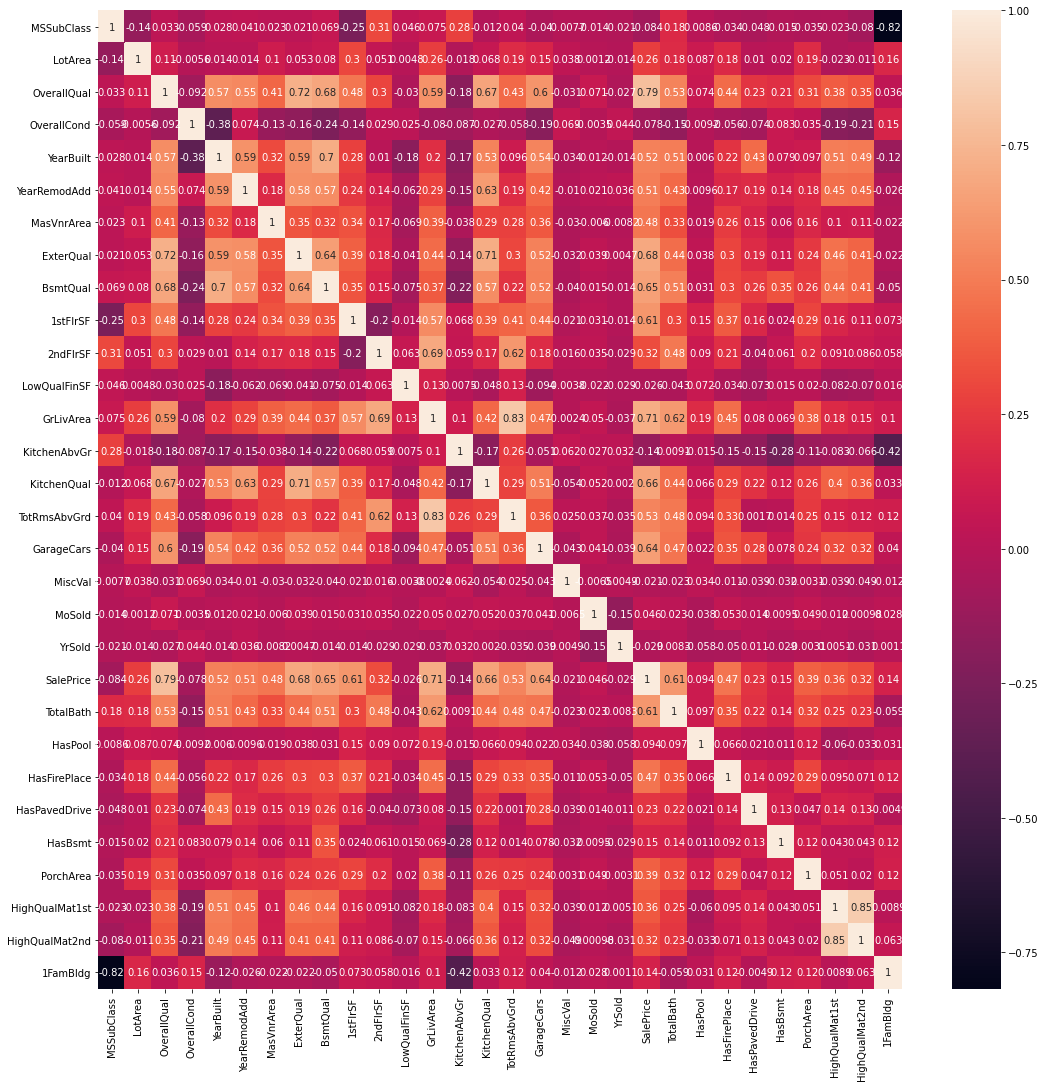

In [71]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = train.corr()
plt.figure(figsize = (18,18))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [91]:
train.corr()['SalePrice'].sort_values()

OverallCond      -0.077856
YrSold           -0.028923
HasPool           0.093708
1FamBldg          0.137483
HasBsmt           0.152829
HasPavedDrive     0.231968
LotArea           0.263843
HighQualMat2nd    0.318590
2ndFlrSF          0.319334
HighQualMat1st    0.364253
PorchArea         0.390993
HasFirePlace      0.471908
MasVnrArea        0.477493
YearRemodAdd      0.507101
YearBuilt         0.522897
TotRmsAbvGrd      0.533723
1stFlrSF          0.605852
TotalBath         0.613005
GarageCars        0.640409
BsmtQual          0.648938
KitchenQual       0.659600
ExterQual         0.681183
GrLivArea         0.708624
OverallQual       0.790982
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [90]:
train.drop(columns=['MoSold', 'MiscVal', 'LowQualFinSF', 'KitchenAbvGr'], inplace=True)
train['MSSubClass'] = train['MSSubClass'].apply(str)

In [89]:
px.box(train, x='KitchenAbvGr', y='SalePrice').show()

## Variables in doubts

- Neighboorhood
- Foundation
- QualMatExterior
- MSZoning
- MSSubClass
- Remove outliers lotarea

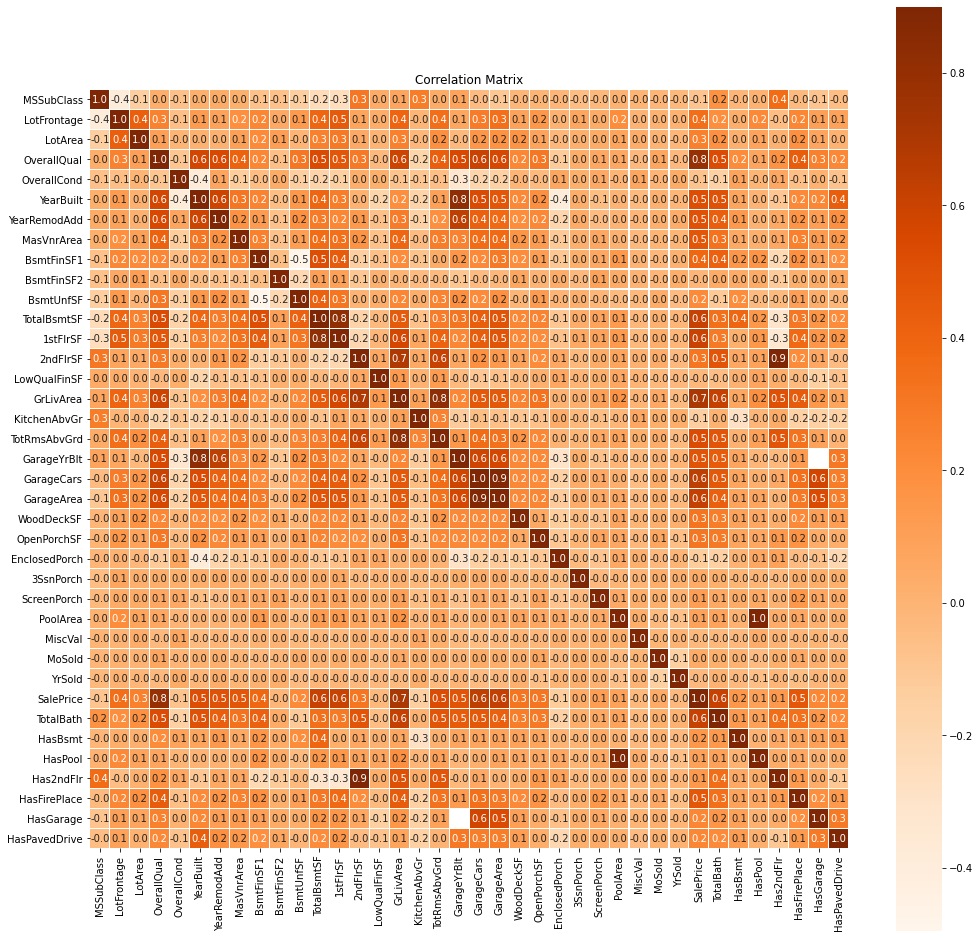

In [64]:
import seaborn as sb
import matplotlib.pyplot as plt

corrmat = train.corr()
plt.subplots(figsize=(17,17))
plt.title("Correlation Matrix")
# sb.heatmap(corrmat, vmax=0.9, vmin=0.5, square=True, cmap='YlGnBu')
sb.heatmap(corrmat, vmax=0.9, square=True, cmap="Oranges", annot=True, fmt='.1f', linewidth='.1')

In [92]:
len(train.columns)

35